# **Loan Approval Prediction**

This dataset provides details of various bank customers applying for loans, along with labels indicating whether each customer's loan was approved or not.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing required libraries**

In [ ]:
import numpy
import sklearn
from sklearn import preprocessing
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import matplotlib.pyplot as plt

# Loading and Preprocessing dataset

**Loading dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Loan Approval dataset/loan_approval_dataset.csv")

In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


**Checking for NULL Values**

In [ ]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

Perform **One hot encoding** on categorical columns using Label Encoders (**Feature Engineering**)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
label_encoder_y = preprocessing.LabelEncoder()
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
df[' education'] = label_encoder.fit_transform(df[' education'])
df[' self_employed'] = label_encoder.fit_transform(df[' self_employed'])
df[' loan_status'] = label_encoder_y.fit_transform(df[' loan_status'])
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


Convert dataframe to numpy before splitting dataset into training and testing sets

In [ ]:
np_loan = df.to_numpy()
X_data = np_loan[:,1:12]
Y_data=np_loan[:,12]

#Scale the data to ease the computation and prevent loss
scaler = StandardScaler().fit(X_data)
X_data = scaler.transform(X_data)
Y_data = tf.keras.utils.to_categorical(Y_data,num_classes = 2)

**Train test split**

In [ ]:
#Splitting data into train and test with a ratio of 80:20
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_data,train_size = 0.8)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(3415, 11) (3415, 2) (854, 11) (854, 2)


**Defining and Compiling the model**

In [ ]:
#Defining the model, you can add or delete layers here and change the parameters to understand how it affects accuracy.

model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(512,input_shape = (11,),name = "Hidden_layer_1",activation="relu"))
model.add(keras.layers.Dense(512,name = "Hidden_layer_2",activation="relu"))
#model.add(keras.layers.Dense(16,name = "Hidden_layer_3",activation="relu"))
model.add(keras.layers.Dense(128,name = "Hidden_layer_4",activation="relu"))
model.add(keras.layers.Dense(2,name = "Output_layer",activation="softmax"))
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer_1 (Dense)      (None, 512)               6144      
                                                                 
 Hidden_layer_2 (Dense)      (None, 512)               262656    
                                                                 
 Hidden_layer_4 (Dense)      (None, 128)               65664     
                                                                 
 Output_layer (Dense)        (None, 2)                 258       
                                                                 
Total params: 334722 (1.28 MB)
Trainable params: 334722 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Training the Model**

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train,
                    Y_train,
                    batch_size=8,
                    epochs=30,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[early_stopping])


Epoch 1/30
385/385 [==============================] - 1s 4ms/step - loss: 0.0681 - accuracy: 0.9753 - val_loss: 0.2248 - val_accuracy: 0.9444
Epoch 2/30
385/385 [==============================] - 2s 5ms/step - loss: 0.0648 - accuracy: 0.9762 - val_loss: 0.3018 - val_accuracy: 0.9357
Epoch 3/30
385/385 [==============================] - 2s 5ms/step - loss: 0.0633 - accuracy: 0.9788 - val_loss: 0.1834 - val_accuracy: 0.9503
Epoch 4/30
385/385 [==============================] - 1s 4ms/step - loss: 0.0645 - accuracy: 0.9756 - val_loss: 0.2262 - val_accuracy: 0.9415
Epoch 5/30
385/385 [==============================] - 1s 4ms/step - loss: 0.0558 - accuracy: 0.9805 - val_loss: 0.3188 - val_accuracy: 0.9386
Epoch 6/30
385/385 [==============================] - 1s 3ms/step - loss: 0.0565 - accuracy: 0.9821 - val_loss: 0.2001 - val_accuracy: 0.9444
Epoch 7/30
385/385 [==============================] - 1s 3ms/step - loss: 0.0549 - accuracy: 0.9792 - val_loss: 0.2910 - val_accuracy: 0.9415
Epoch 

In [ ]:
# history=model.fit(X_train, Y_train, batch_size=8, epochs=30, verbose=1, validation_split=0.1)

In [ ]:
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

print("\nEvaluation against Test Dataset :\n")
model.evaluate(X_test,Y_test)

NameError: name 'pd' is not defined

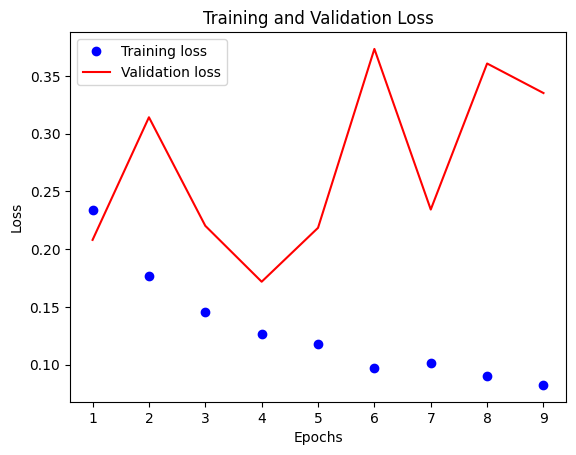

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

# Plotting the learning curves
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'model' is your trained neural network model
# Assuming 'X_test' contains the test input features and 'Y_test' contains the corresponding target labels

# Make predictions using the trained model
Y_pred = model.predict(X_test)

# Convert predicted probabilities to binary class labels
Y_pred_classes = (Y_pred > 0.5).astype(int)

# Compute evaluation metrics
accuracy = accuracy_score(Y_test, Y_pred_classes)
precision = precision_score(Y_test, Y_pred_classes, average='micro')
recall = recall_score(Y_test, Y_pred_classes, average='micro')
f1 = f1_score(Y_test, Y_pred_classes, average='micro')

# Print or store the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


27/27 [==============================] - 0s 3ms/step
Accuracy: 0.9332552693208431
Precision: 0.9332552693208431
Recall: 0.9332552693208431
F1-score: 0.9332552693208432
